## Observations and Insights 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "/Users/ismahanadan/Desktop/matplotlib-challenge/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/ismahanadan/Desktop/matplotlib-challenge/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata_df, study_results_df, how="outer", on=["Mouse ID"])


# Display the data table for preview

combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [27]:
# Checking the number of mice
num_mice =  combined_data_df["Mouse ID"].count()
num_mice

1893

In [28]:
# Optional: Get all the data for the duplicate mouse ID. 



In [52]:
duplicate = combined_data_df[combined_data_df.duplicated('Mouse ID')]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [53]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_data_df = combined_data_df.drop_duplicates(subset=['Mouse ID'])
clean_data_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [54]:
# Checking the number of mice in the clean DataFrame.
num_mice =  clean_data_df["Mouse ID"].count()
num_mice

249

## Summary Statistics

In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regime
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Create summary df
summary_df = combined_data_df.groupby('Drug Regimen')

 #Calculate the mean, median, standard deviation, and sem for each drug
tumor_vol_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_vol_median = summary_df['Tumor Volume (mm3)'].median()
tumor_vol_var = summary_df['Tumor Volume (mm3)'].var()
tumor_vol_stdev = summary_df['Tumor Volume (mm3)'].std()
tumor_vol_sem = summary_df['Tumor Volume (mm3)'].sem()

# tumor_summary_df = pd.DataFrame({"Mean": tumor_vol_mean,
#                                 "Median": tumor_vol_median,
#                                 "Variance": tumor_vol_var,
#                                 "standard Deviation": tumor_vol_stdev,
#                                 "SEM": tumor_vol_sem})

# Create DataFrame to summarize calculations
summary_grouped_df = pd.DataFrame({'Mean': tumor_vol_mean, 'Median':tumor_vol_median,'Variance': tumor_vol_var,
                                   'Standard Deviation': tumor_vol_stdev, 'SEM': tumor_vol_sem})

summary_grouped_df.head()




,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

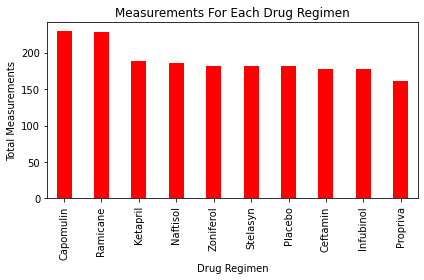

In [65]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Plot a bar chart on the amount of data points using value_count
# Groupby Drug Regimen
drugs_chart = combined_data_df['Drug Regimen'].value_counts().plot.bar(width=0.4, color='red')

# Set the xlabel and ylabel using class methods
drugs_chart.set_xlabel("Drug Regimen")
drugs_chart.set_ylabel("Total Measurements")
plt.title('Measurements For Each Drug Regimen')
plt.tight_layout()


plt.show()






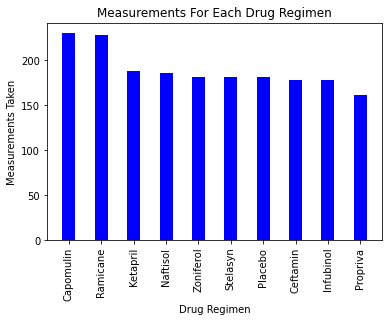

In [66]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Calculate the number of measurement taken for each drug regimen
counts =  combined_data_df['Drug Regimen'].value_counts()

# Set the x_axis to the length of the 'counts' series
x_axis = np.arange(len(counts))

# Generate a bar blot with the length of the 'counts' series
# as the amount of values on the x axis, and the corresponding values
# in the series as the y values
plt.bar(x_axis, counts, width = 0.4, color='blue')

# # Label the tick marks according to the index values in the 'counts' series
# Rotate tick marks 90 degrees for better visibility
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Measurements Taken")
plt.title('Measurements For Each Drug Regimen')


# Display plot
plt.show()


Text(0, 0.5, '')

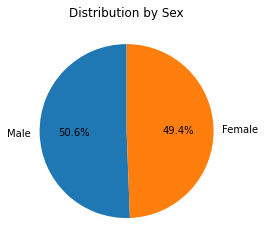

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Identify distribution of data by sex
sex_data = combined_data_df['Sex'].value_counts()

# Plot a pie chart filled with corresponding percentages and displayed vertically
pie_plot = sex_data.plot.pie(startangle=90, autopct="%1.1f%%", title='Distribution by Sex')

# Hide the 'y' label
pie_plot.set_ylabel('')



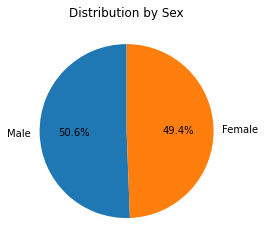

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Identify distribution of data by sex
sex_data = combined_data_df['Sex'].value_counts()

# create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(sex_data, labels=sex_data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')

# Display resulting plot
plt.show()

## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(combined_data_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_timepoint


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = pd.merge(combined_data_df,max_timepoint, on='Mouse ID')
merged_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [45]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

drugs = ['Capomulin', 'Ramicane', 'Ketapril','Infubinol', 'Ceftamin']
drug_values = []

for drug in drugs:
    
    treatment_df = merged_data.loc[merged_data['Drug Regimen'] == drug]

    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    final_volume = treatment_df.loc[treatment_df['Timepoint'] == treatment_df['max_timepoint']]
    
    # Create a series that consists of all final volume values for each regimen
    values = final_volume['Tumor Volume (mm3)']
    drug_values.append(values)
    
    # Calculate then print the IQR for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers_count = (values.loc[(final_volume['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')
    

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Ketapril: 13.152155339999993
Lower Bound for Ketapril: 36.99186244000001
Upper Bound for Ketapril: 89.60048379999998
Number of Ketapril outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


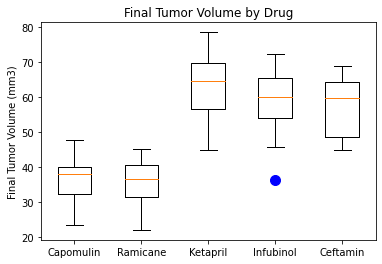

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='b', markersize=10, markeredgecolor='blue')

# Plot boxplot
plt.boxplot(drug_values, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4, 5], ['Capomulin', 'Ramicane', 'Ketapril','Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

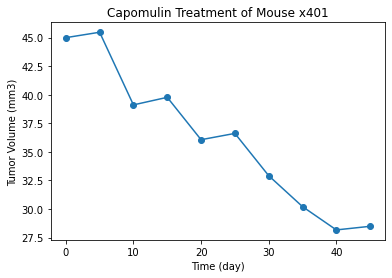

In [47]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Identify data points of a mouse treated with Capomulin
mouse = combined_data_df.loc[combined_data_df['Mouse ID'] == 'x401']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Time (day)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse x401")

# Display plot
plt.show()


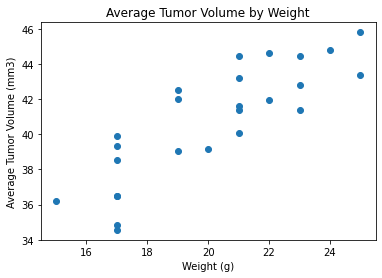

In [48]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# filter for data points  that only use the Capomulin regimen
capomulin = combined_data_df.loc[combined_data_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol = pd.DataFrame(capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol = pd.merge(capomulin, avg_vol, on='Mouse ID')
final_avg_vol = avg_vol[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol

x = final_avg_vol['Weight (g)']
y = final_avg_vol['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()


## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


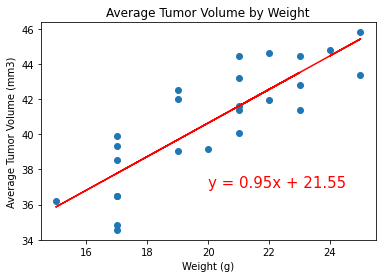

In [49]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# filter for data points  that only use the Capomulin regimen
capomulin = combined_data_df.loc[combined_data_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol = pd.DataFrame(capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol = pd.merge(capomulin, avg_vol, on='Mouse ID')
final_avg_vol = avg_vol[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol

x = final_avg_vol['Weight (g)']
y = final_avg_vol['avg_tumor_vol']

#Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
# Annotate linear regression
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# label and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()